In [1]:
import sys

sys.path.append("ml-tools-direct-method")

In [2]:
from tools.bandit import generate_bandit_feedback
from tools.estimate import get_estimator_stats, get_value_estimators
from tools.policy import ModelPolicy, UniformPolicy
from tools.utils import datasets, get_bandit, split_data

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import default_rng
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_palette("colorblind")
colors = sns.color_palette()
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 14

X_MED = 10
Y_MED = 6
XY_MED = (X_MED, Y_MED)

In [3]:
SKIP_NONLIN = True
NUM_TRIALS = 20

## Experiments with Small Public Datasets 

In [15]:
frames = {}
for data in datasets:

    if data in [
        "satimage",
        "vehicle",
        #"pendigits",
    ]:  # skip these for now, I don't expect them to converge in a linear model.
        continue

    # configure dataset into bandit setting
    contexts, full_rewards, best_actions = get_bandit(data)
    n, k = full_rewards.shape
    _, d = contexts.shape
    print(
        f"This dataset has {k} actions, the context space has {d} dimensions, and there are {n} examples."
    )

    # split train test sets
    rng = default_rng(3)
    X_train, y_train, X_test, y_test, full_rewards_test = split_data(
        contexts, full_rewards, best_actions, rng
    )

    # create target policy using logreg
    print("Fitting target policy")
    model = LogisticRegression(multi_class="multinomial", max_iter=10000)
    model.fit(X_train, y_train)
    target_policy = ModelPolicy(model=model, num_actions=k)
    # get true value of target policy -> treated as ground truth for comparing estimates
    target_policy_true_value = target_policy.get_value_estimate(
        X_test, full_rewards_test
    )

    # create logging policy
    logging_policy = UniformPolicy(num_actions=k)

    # run 500 simulations
    trials = NUM_TRIALS
    val_ests = []
    policy = target_policy
    policy_true_value = policy.get_value_estimate(X_test, full_rewards_test)
    rng = default_rng(6)
    print("Simulating...")
    for i in tqdm(range(trials)):
        contexts, actions, rewards, propensities = generate_bandit_feedback(
            X_test, full_rewards_test, logging_policy, rng=rng
        )
        est = get_value_estimators(
            policy,
            contexts,
            actions,
            rewards,
            propensities,
            skip_nonlin=SKIP_NONLIN,
        )
        val_ests.append(est)

    df = pd.DataFrame(val_ests)
    print(f"Target policy true value {target_policy_true_value}.")
    df_stats = get_estimator_stats(df, true_parameter_value=policy_true_value)
    df_stats["true"] = policy_true_value
    print(df_stats)

    frames[data] = df_stats

 10%|█         | 2/20 [00:00<00:01, 15.08it/s]

Loaded ecoli from local csv
This dataset has 8 actions, the context space has 7 dimensions, and there are 336 examples.
Fitting target policy
?
??
Simulating...


100%|██████████| 20/20 [00:01<00:00, 16.71it/s]


Target policy true value 0.5528155516354565.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.509757  0.112220  0.012593  0.025093  0.043059  0.120197   
1         dm  0.490564  0.037496  0.001406  0.008384  0.062252  0.072672   
2      dm_iw  0.554380  0.040380  0.001631  0.009029  0.001564  0.040411   
3     dm_log  0.317838  0.050923  0.002593  0.011387  0.234977  0.240432   
4  dm_log_iw  0.529288  0.048365  0.002339  0.010815  0.023528  0.053784   
5         dr  0.538959  0.037806  0.001429  0.008454  0.013856  0.040265   

       true  
0  0.552816  
1  0.552816  
2  0.552816  
3  0.552816  
4  0.552816  
5  0.552816  
Loaded glass from local csv
This dataset has 6 actions, the context space has 9 dimensions, and there are 214 examples.
Fitting target policy


  0%|          | 0/20 [00:00<?, ?it/s]

?
??
Simulating...


100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


Target policy true value 0.4614749348080331.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.464838  0.106438  0.011329  0.023800  0.003363  0.106491   
1         dm  0.441852  0.092200  0.008501  0.020616  0.019623  0.094265   
2      dm_iw  0.485947  0.110929  0.012305  0.024805  0.024472  0.113597   
3     dm_log  0.377873  0.060839  0.003701  0.013604  0.083602  0.103396   
4  dm_log_iw  0.446018  0.075012  0.005627  0.016773  0.015457  0.076588   
5         dr  0.471550  0.096531  0.009318  0.021585  0.010075  0.097056   

       true  
0  0.461475  
1  0.461475  
2  0.461475  
3  0.461475  
4  0.461475  
5  0.461475  
Loaded letter-recognition from local csv
This dataset has 26 actions, the context space has 16 dimensions, and there are 20000 examples.
Fitting target policy


  0%|          | 0/20 [00:00<?, ?it/s]

?
??
Simulating...


100%|██████████| 20/20 [01:31<00:00,  4.57s/it]


Target policy true value 0.642203645455189.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.663719  0.033033  0.001091  0.007386  0.021516  0.039422   
1         dm  0.221659  0.007858  0.000062  0.001757  0.420545  0.420618   
2      dm_iw  0.626259  0.014693  0.000216  0.003285  0.015945  0.021682   
3     dm_log  0.425292  0.010858  0.000118  0.002428  0.216912  0.217183   
4  dm_log_iw  0.608453  0.012771  0.000163  0.002856  0.033751  0.036086   
5         dr  0.639964  0.024414  0.000596  0.005459  0.002239  0.024517   

       true  
0  0.642204  
1  0.642204  
2  0.642204  
3  0.642204  
4  0.642204  
5  0.642204  
Loaded optdigits from local csv
This dataset has 10 actions, the context space has 64 dimensions, and there are 5620 examples.
Fitting target policy


  0%|          | 0/20 [00:00<?, ?it/s]

?
??
Simulating...


100%|██████████| 20/20 [00:49<00:00,  2.47s/it]


Target policy true value 0.9554505815120042.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.988055  0.040786  0.001664  0.009120  0.032605  0.052217   
1         dm  0.688772  0.011962  0.000143  0.002675  0.266679  0.266947   
2      dm_iw  0.926030  0.019880  0.000395  0.004445  0.029420  0.035507   
3     dm_log  0.881224  0.008440  0.000071  0.001887  0.074227  0.074705   
4  dm_log_iw  0.955475  0.007777  0.000060  0.001739  0.000024  0.007777   
5         dr  0.917453  0.016294  0.000265  0.003643  0.037998  0.041344   

       true  
0  0.955451  
1  0.955451  
2  0.955451  
3  0.955451  
4  0.955451  
5  0.955451  
Loaded pendigits from local csv
This dataset has 10 actions, the context space has 16 dimensions, and there are 10992 examples.
Fitting target policy


/Users/danturkel/.pyenv/versions/3.6.12/envs/ml-tools/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
  0%|          | 0/20 [00:00<?, ?it/s]

?
??
Simulating...


 20%|██        | 4/20 [00:26<01:36,  6.02s/it]/Users/danturkel/.pyenv/versions/3.6.12/envs/ml-tools/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
  0%|          | 0/20 [00:00<?, ?it/s]

Target policy true value 0.9294766443508493.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.914746  0.047744  0.002279  0.010676  0.014731  0.049965   
1         dm  0.547103  0.014318  0.000205  0.003202  0.382374  0.382642   
2      dm_iw  0.932739  0.006930  0.000048  0.001550  0.003262  0.007659   
3     dm_log  0.857973  0.007792  0.000061  0.001742  0.071504  0.071927   
4  dm_log_iw  0.916987  0.007622  0.000058  0.001704  0.012490  0.014632   
5         dr  0.915340  0.020505  0.000420  0.004585  0.014137  0.024906   

       true  
0  0.929477  
1  0.929477  
2  0.929477  
3  0.929477  
4  0.929477  
5  0.929477  
Loaded yeast from local csv
This dataset has 10 actions, the context space has 8 dimensions, and there are 1484 examples.
Fitting target policy
?
??
Simulating...


100%|██████████| 20/20 [00:04<00:00,  4.28it/s]

Target policy true value 0.3314289525705208.
        stat      mean        SD       var        SE      bias      RMSE  \
0         iw  0.320593  0.043729  0.001912  0.009778  0.010836  0.045051   
1         dm  0.297468  0.026275  0.000690  0.005875  0.033961  0.042939   
2      dm_iw  0.334247  0.025241  0.000637  0.005644  0.002818  0.025398   
3     dm_log  0.234326  0.024165  0.000584  0.005403  0.097103  0.100065   
4  dm_log_iw  0.327586  0.027799  0.000773  0.006216  0.003843  0.028064   
5         dr  0.332969  0.027028  0.000731  0.006044  0.001540  0.027072   

       true  
0  0.331429  
1  0.331429  
2  0.331429  
3  0.331429  
4  0.331429  
5  0.331429  


In [16]:
frames

{'ecoli':         stat      mean        SD       var        SE      bias      RMSE  \
 0         iw  0.509757  0.112220  0.012593  0.025093  0.043059  0.120197   
 1         dm  0.490564  0.037496  0.001406  0.008384  0.062252  0.072672   
 2      dm_iw  0.554380  0.040380  0.001631  0.009029  0.001564  0.040411   
 3     dm_log  0.317838  0.050923  0.002593  0.011387  0.234977  0.240432   
 4  dm_log_iw  0.529288  0.048365  0.002339  0.010815  0.023528  0.053784   
 5         dr  0.538959  0.037806  0.001429  0.008454  0.013856  0.040265   
 
        true  
 0  0.552816  
 1  0.552816  
 2  0.552816  
 3  0.552816  
 4  0.552816  
 5  0.552816  ,
 'glass':         stat      mean        SD       var        SE      bias      RMSE  \
 0         iw  0.464838  0.106438  0.011329  0.023800  0.003363  0.106491   
 1         dm  0.441852  0.092200  0.008501  0.020616  0.019623  0.094265   
 2      dm_iw  0.485947  0.110929  0.012305  0.024805  0.024472  0.113597   
 3     dm_log  0.377873  0.

In [17]:
#save estimator dfs for each dataset (so we don't need to re-run)
for frame in frames:
    frames[frame].to_csv(frame+'.csv')

In [22]:
#only load in datasets used
datasets = ['ecoli','glass','letter-recognition','optdigits','yeast','pendigits']

frames = {}
for data in datasets:
    frames[data] = pd.read_csv(data+'.csv')

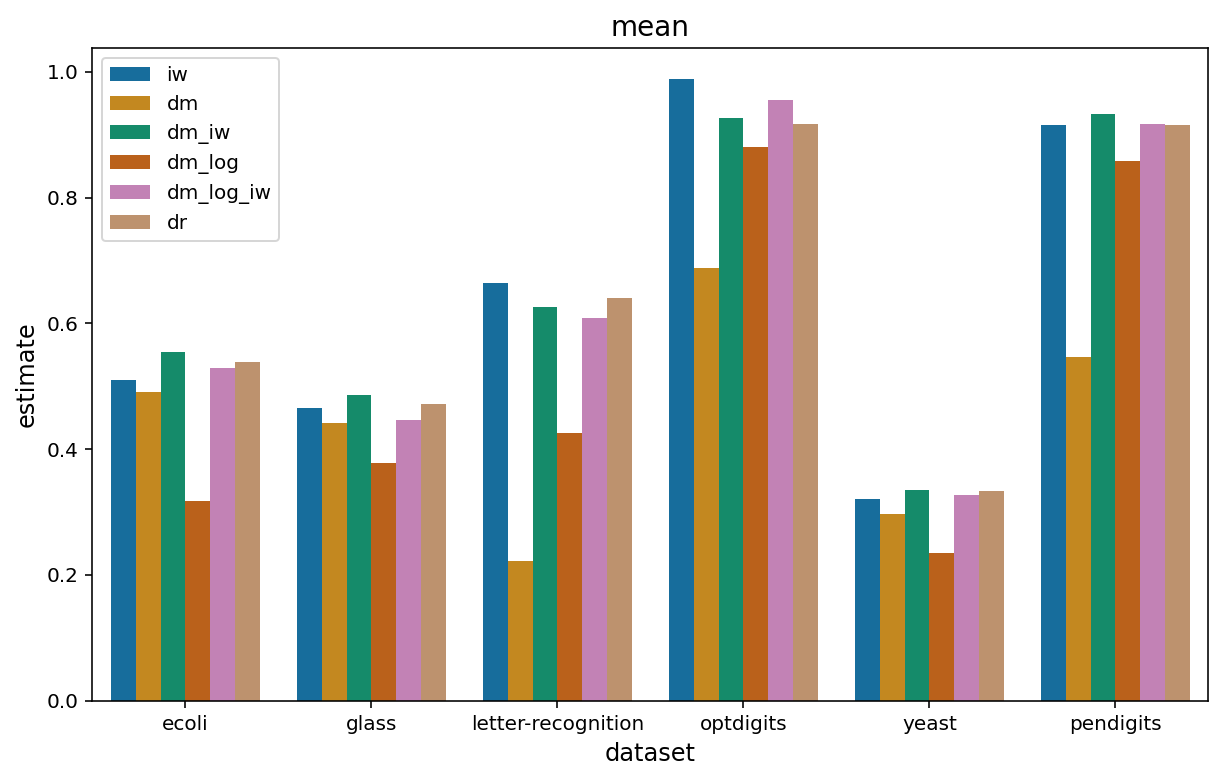

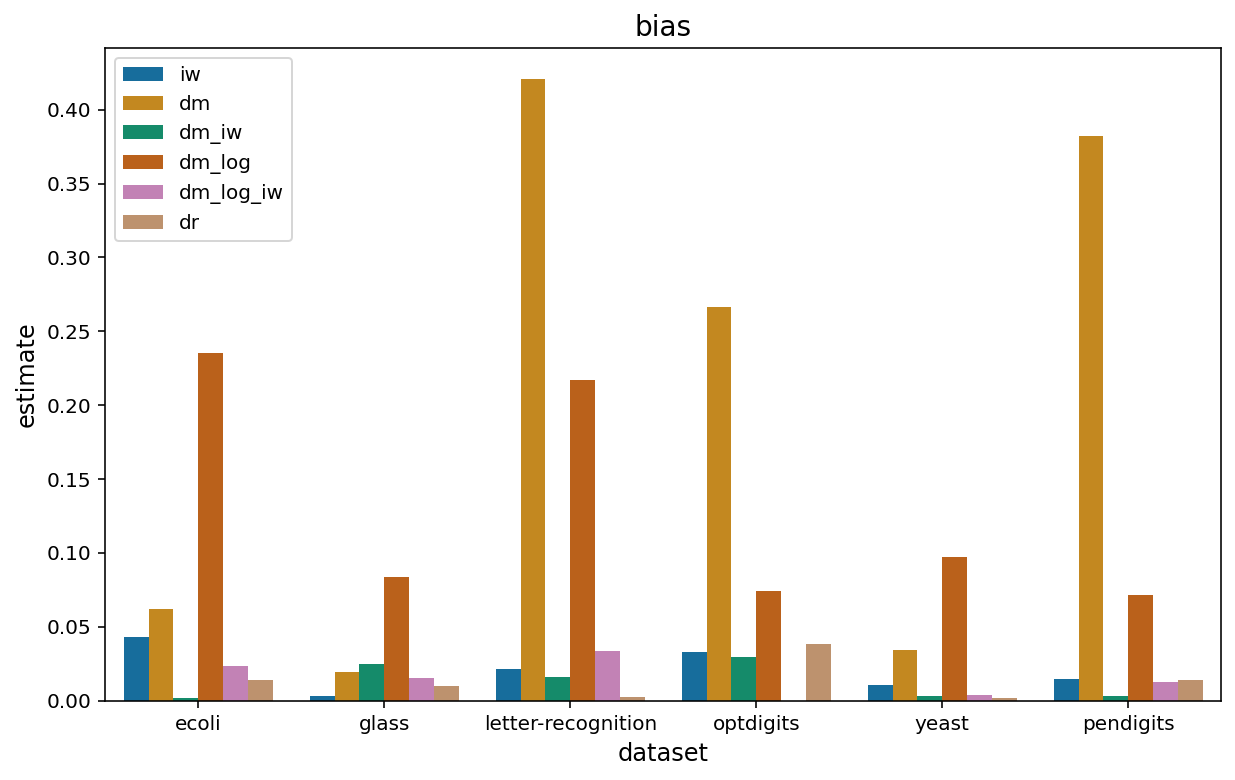

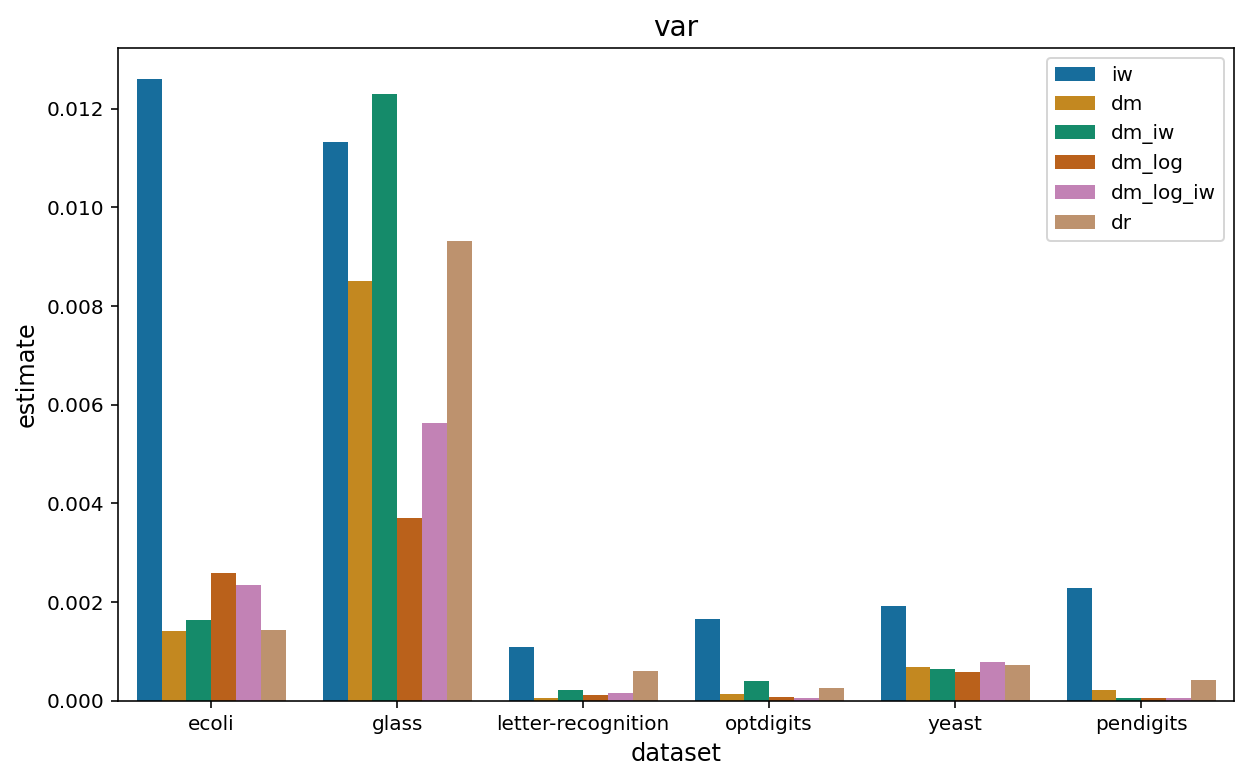

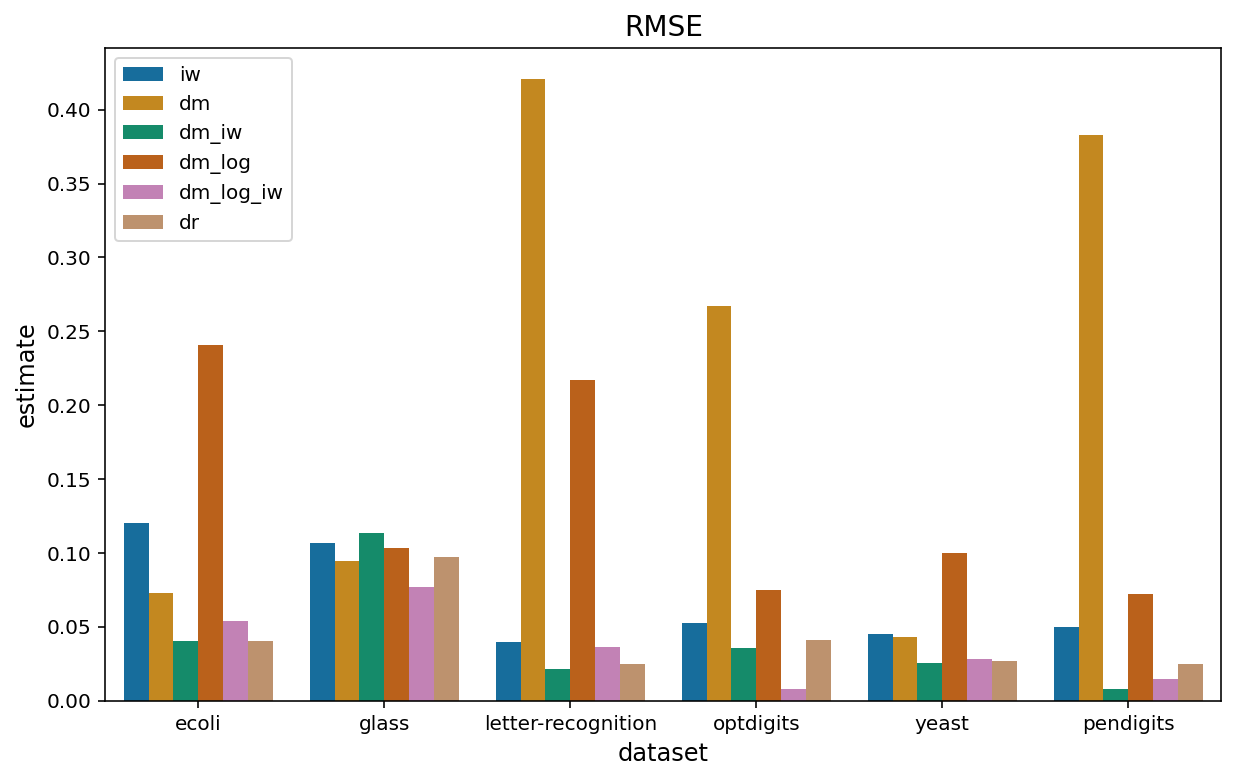

In [23]:
# visualize estimator stats for each dataset

stats = ["mean", "bias", "var", "RMSE"]
skip_nonlin = SKIP_NONLIN
for stat in stats:
    iw = []
    dm = []
    dm_iw = []
    dm_log = []
    dm_log_iw = []
    dr = []
    dm_rf = []
    dr_rf = []
    for data in datasets:

        iw.append(abs(frames[data][stat][0]))
        dm.append(abs(frames[data][stat][1]))
        dm_iw.append(abs(frames[data][stat][2]))
        dm_log.append(abs(frames[data][stat][3]))
        dm_log_iw.append(abs(frames[data][stat][4]))
        dr.append(abs(frames[data][stat][5]))

        if not skip_nonlin:
            dm_rf.append(abs(frames[data][stat][6]))
            dr_rf.append(abs(frames[data][stat][7]))

    if skip_nonlin:
        df = pd.DataFrame(
            np.c_[iw, dm, dm_iw, dm_log, dm_log_iw, dr],
            index=datasets,
            columns=["iw", "dm", "dm_iw", "dm_log", "dm_log_iw", "dr"],
        )
        df = (
            df.reset_index()
            .rename({"index": "dataset"}, axis=1)
            .melt(id_vars=["dataset"], var_name="estimator", value_name="estimate")
        )
    else:
        df = pd.DataFrame(
            np.c_[iw, dm, dm_iw, dm_log, dm_log_iw, dr, dm_rf, dr_rf],
            index=datasets,
            columns=[
                "iw",
                "dm",
                "dm_iw",
                "dm_log",
                "dm_log_iw",
                "dr",
                "dm_rf",
                "dr_rf",
            ],
        )
        df = (
            df.reset_index()
            .rename({"index": "dataset"}, axis=1)
            .melt(id_vars=["dataset"], var_name="estimator", value_name="estimate")
        )

    fig, ax = plt.subplots(figsize=XY_MED)
    sns.barplot(data=df, x="dataset", y="estimate", hue="estimator", ax=ax)
    ax.legend()
    ax.set_title(stat)
    ax.tick_params(axis="x", labelrotation=0)